# Création d'un scatter plot (plus) interactif

## IPYWIDGET

Nous allons maitenant explorer la librarie [ipywidget](https://ipywidgets.readthedocs.io/en/latest/index.html).
Elle permet la construction d'un interface utilisateur dans les cellules du notebook. Elle peut prendre en charge:
* [La création d'éléments](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html)(les *widgets*) comme un bouton ou un slider
* [L'organisation des éléments](https://ipywidgets.readthedocs.io/en/latest/examples/Layout%20Templates.html) dans la cellule d'affichage de Jupyter
* L'expression de lien entres widgets et figures matplotlib pour permettre d'interagire avec ces images.

L'objectif est de fournir ici une introduction à ce module. Une description plus complète devra être consultée [ici](https://ipywidgets.readthedocs.io/en/latest/). Un tutoriel récent est accessible [ici](https://kapernikov.com/ipywidgets-with-matplotlib/)

In [1]:
import matplotlib
matplotlib.__version__

'3.5.2'

In [2]:
%matplotlib notebook

### Quelques exemples de widgets
Jupyter fournit un grand nombre de [widgets](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html) pour permettre la selection et l'affichage de valeurs ou selection de variables. 

#### widget simple

In [3]:
#import ipywidgets as widgets
import ipywidgets 
from IPython.display import display
w = ipywidgets.IntSlider()
display(w)

IntSlider(value=0)

#### widgets combinés

In [4]:
a = ipywidgets.FloatText()
b = ipywidgets.FloatSlider()
display(a,b)

mylink = ipywidgets.jslink((a, 'value'), (b, 'value'))

FloatText(value=0.0)

FloatSlider(value=0.0)

#### Inférence du widget avec interact
On peut se passer d'un construteur et demander à Jupyter d'inférer le widget adapté à une variable. Pour ce faire, on passera cette variable en paramètre de la fonction **interact**, dans ce cas un nombre *w* flottant. Dans le corps de la fonction *update*, on va spécifier les actions à effectuer lorsque l'état du widget change, ici modifier une figure.

<IPython.core.display.Javascript object>


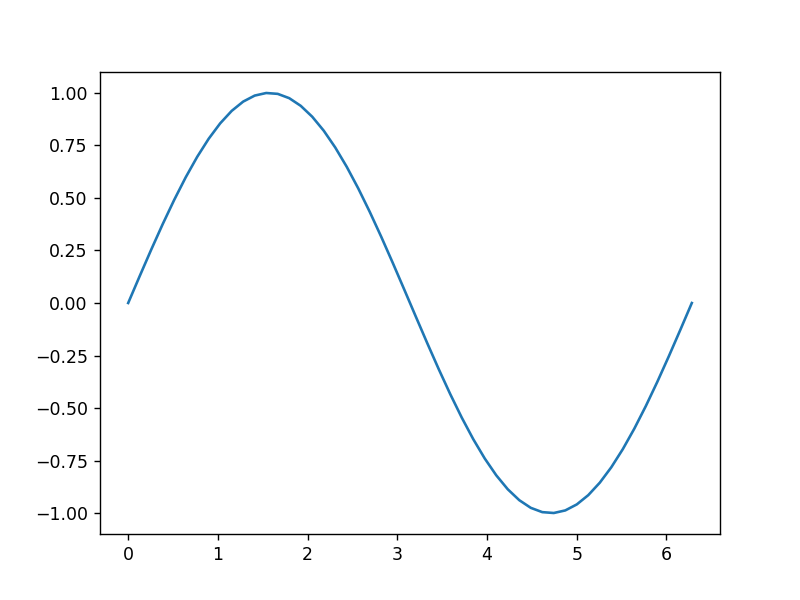

interactive(children=(FloatSlider(value=1.0, description='w', max=3.0, min=-1.0), Output()), _dom_classes=('wi…

In [5]:
from ipywidgets import interact
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2 * np.pi)
fig = plt.figure()
# Set to True to display figure toolbar
fig.canvas.toolbar_visible=False
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(x, np.sin(x))

def update(w = 1.0):
    line.set_ydata(np.sin(w * x))
    fig.canvas.draw_idle()

interact(update);

Jupyter construit le widget adapté au paramètre de la fonction interact. Ici une liste.

<IPython.core.display.Javascript object>


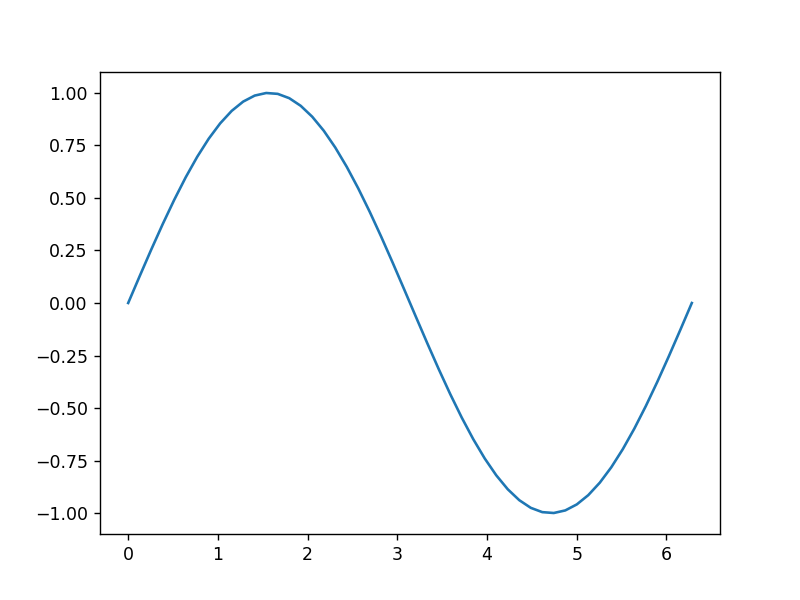

interactive(children=(Dropdown(description='w', options=(1, 3, 6), value=1), Output()), _dom_classes=('widget-…

In [6]:
x = np.linspace(0, 2 * np.pi)
fig = plt.figure()
fig.canvas.toolbar_visible=False
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(x, np.sin(x))

def update(w=[1,3,6]):
    line.set_ydata(np.sin(w * x))
    fig.canvas.draw_idle()

interact(update);

**Interact** peut aussi prendre en argument un **widget construit explicitement**. Ainsi, l'exemple suivant se comportera de manière identique au précédent.

<IPython.core.display.Javascript object>


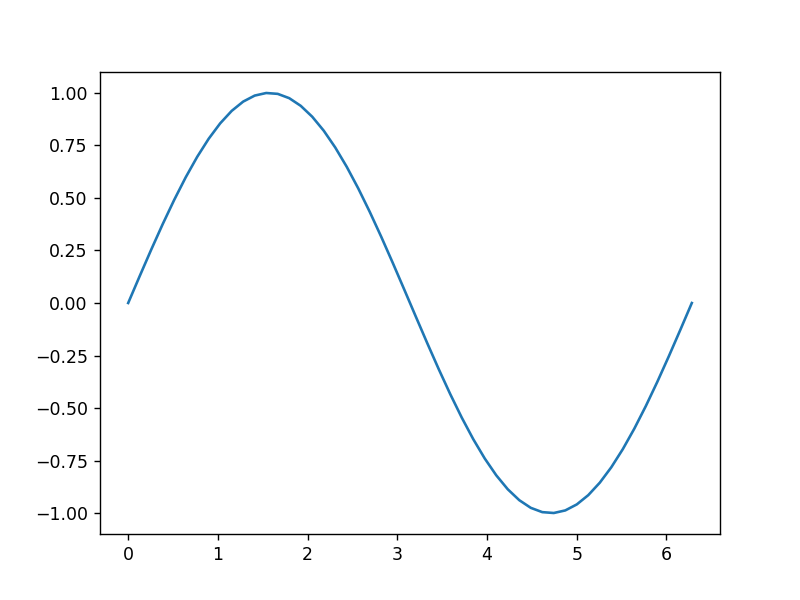

interactive(children=(Dropdown(description='Number:', options=(1, 3, 6), value=1), Output()), _dom_classes=('w…

<function __main__.update(w=Dropdown(description='Number:', options=(1, 3, 6), value=1))>

In [7]:
wDrop = ipywidgets.Dropdown(
    options=[1,3,6],
    value=1,
    description='Number:',
    disabled=False,
)

x = np.linspace(0, 2 * np.pi)
fig = plt.figure()
fig.canvas.toolbar_visible=False
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(x, np.sin(x))

def update(w=wDrop):
    line.set_ydata(np.sin(w * x))
    fig.canvas.draw_idle()

interact(update)

## Contrôle des widgets

Le modèle de widgets de Jupyter permet de controler précisement leurs apparence et leurs dispositions.

L'apparence d'un widget est controlée par son attribut **style**.
```python
b1 = Button(description='Custom color')
b1.style.button_color = 'lightgreen'
b1
```

![caption](../figs/wstyle.png)
Ces attributs ne sont pas des termes CSS mais leurs émulations python. Pour connaitre la liste des attributs de style d'un widget on procédera ainsi:
```python
b1.style.keys

['_model_module',
 '_model_module_version',
 '_model_name',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'button_color',
 'font_weight']
```

A noter que les attributs style peuvent être définis de façon equivalente à la construction.
```python
b1 = Button(description='Custom color',style=ButtonStyle(button_color='lightgreen'))
b1
```
![caption](../figs/wstyle.png)

## Disposition spatiale des widgets

Le positionnement individuel des widgets est contrôlé par le paramètre **layout**. Exemple de  création d'un bouton de hauteur et largeur 80px.
```python
 b=Button(description='my awesome button',
           layout=Layout(width='50%', height='80px'))
```
L'ensemble des valeurs de positionnement est accessible de manière analogue aux valeurs de **style**.
```python
b1.layout.keys
[ ...
 'align_content',
 'align_items',
 'align_self',
 'border',
 'bottom',
 'display',
 ...
 'overflow_x',
 'overflow_y',
 'padding',
 'right',
 'top',
 'visibility',
 'width']
```

L'organisation de plusieurs widgets peut être [contrôlée à bas niveau](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20Styling.html#The-Flexbox-layout) par les classes `Hbox` et `Vbox`. Cependant, pour les besoins de ce TP, nous leurs préférerons les trois méthodes suivantes, de plus "haut niveau".

#### GridBox
Cette méthode est une implémentation python de [l'affichage en grille de CSS](https://css-tricks.com/snippets/css/complete-guide-grid/). Elle est illustrée dans l'exemple ci-dessous
```python
from ipywidgets import Button, GridBox, Layout, ButtonStyle
header  = Button(description='Header',
                 layout=Layout(width='auto', grid_area='header'),
                 style=ButtonStyle(button_color='lightblue'))
main    = Button(description='Main',
                 layout=Layout(width='auto', grid_area='main'),
                 style=ButtonStyle(button_color='moccasin'))
sidebar = Button(description='Sidebar',
                 layout=Layout(width='auto', grid_area='sidebar'),
                 style=ButtonStyle(button_color='salmon'))
footer  = Button(description='Footer',
                 layout=Layout(width='auto', grid_area='footer'),
                 style=ButtonStyle(button_color='olive'))

GridBox(children=[header, main, sidebar, footer],
        layout=Layout(
            width='50%',
            grid_template_rows='auto auto auto',
            grid_template_columns='25% 25% 25% 25%',
            grid_template_areas='''
            "header header header header"
            "main main . sidebar "
            "footer footer footer footer"
            ''')
       )
```
![caption](../figs/gridbox.png)

#### AppLayout
D'utilsation plus simple, [cette méthode](https://ipywidgets.readthedocs.io/en/stable/examples/Layout%20Templates.html) propose  une disposition en header, footer, panneau central et barres latérales.

```python
from ipywidgets import AppLayout, Button, Layout
def create_expanded_button(description, button_style):
    return Button(description=description, button_style=button_style, layout=Layout(height='auto', width='auto'))

header_button = create_expanded_button('Header', 'success')
left_button = create_expanded_button('Left', 'info')
center_button = create_expanded_button('Center', 'warning')
right_button = create_expanded_button('Right', 'info')
footer_button = create_expanded_button('Footer', 'success')

AppLayout(header=header_button,
          left_sidebar=left_button,
          center=center_button,
          right_sidebar=right_button,
          footer=footer_button)
```
![caption](../figs/applayout.png)

#### Grid Layout
Cette [méthode](https://ipywidgets.readthedocs.io/en/stable/examples/Layout%20Templates.html#Grid-layout) permet une grande flexibilité des dispositions dans une grille N par M.

```python
from ipywidgets import AppLayout, Button, Layout
def create_expanded_button(description, button_style):
    return Button(description=description, button_style=button_style, layout=Layout(height='auto', width='auto'))

grid = GridspecLayout(4, 3, height='300px')
grid[:, 0] = create_expanded_button('Do', 'info')
grid[:3, 1:] = create_expanded_button('You', 'success')
grid[3, 1] = create_expanded_button('Like', 'warning')
grid[3, 2] = create_expanded_button('Widgets', 'danger')
grid
```
![caption](../figs/gridlayout.png)

### Disposition de figure et widget
Afin de combiner controles (les widgets) et vues (les figures) nous allons **emballer les figures dans un conteneur Output** qui permettra à nos figures d'exposer une API de widgets.
Nous disposerons ensuite ces conteneurs de figures comme de simples widgets !

##### Le conteneur Ouput

Ce widget capture l'affichage d'une cellule Jupyter.
On créé d'abord un widget de type Output,remarquez l'utilisation du paramètre layout 

In [ ]:
import ipywidgets
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
out = ipywidgets.Output(layout={'border': '1px solid black'})
out

Après la création du widget *Output* celui-ci est utilisé comme "*context manager*" dans lequel tout affichage sera capturé. Evaluez la cellule suivante et observé le résultat.
Attention les contenus s'accumule dans un widget Ouput. On effacera son contenu avec la méthode `clear_output()`.

In [ ]:
with out:
    for i in range(10):
        print(i, 'Hello world!')

Puisque tout affichage jupyter peut être capturé dans un ouptut on peut bien sur y mettre nos figures. Evaluez les cellules suivantes et observez le résultat.

In [ ]:
out2 = ipywidgets.Output(layout={'border': '1px solid green'})
out2

In [ ]:
import numpy as np
out2.clear_output()
x, y, = np.random.rand(2, 25)
with out2:
    fig = plt.figure()
    fig.canvas.toolbar_visible=False
    ax1 = fig.add_subplot(111)
    col = ax1.scatter(x, y)

### Une première application intégrant un scatter plot
On peut donc désormais 
1. Créer des widgets de contrôle
2. Creer des figures et les capturer dans des widgets outputs
3. Définir les interactions contrôle-figures
4. Disposer ces éléments dans le layout de notre choix.

Un exemple ci dessous avec deux boutons et le scatter plot ci-dessus.

#### 1. Créer des widgets de contrôle

In [ ]:
from ipywidgets import Button, ButtonStyle, Layout
bLeft = Button(description="<<", style=ButtonStyle(button_color='red'), layout=Layout(height='auto', width='auto'))
bRight =  Button(description=">>", style=ButtonStyle(button_color='green'), layout=Layout(height='auto', width='auto'))

#### 2. Creer des figures et les capturer dans des widgets outputs

In [ ]:
from ipywidgets import Output
outCenter = Output(layout={'border': '1px solid cyan'})
#outCenter

#### 3. Définir les interactions contrôle-figures

In [ ]:
def updateLeft(bLeft):
    col.set_color( [ 'tab:red' for  _ in x ] )

def updateRight(bLeft):
    col.set_color( [ 'tab:green' for  _ in x ] )

bLeft.on_click(updateLeft)
bRight.on_click(updateRight)

#### 4. Disposer ces éléments dans le layout de notre choix.

In [ ]:
from ipywidgets import AppLayout

app=AppLayout(header    = None,
          left_sidebar  = bLeft,
          center        = outCenter,
          right_sidebar = bRight,
          footer        = None)

app

In [ ]:
import numpy as np
x, y, = np.random.rand(2, 25)

with outCenter:
    fig = plt.figure()
    fig.canvas.toolbar_visible=False
    ax1 = fig.add_subplot(111)
    col = ax1.scatter(x, y)

## Construisons un Volcano plot interactif

Nous pouvons desormais construire un volcano plot interactif avec les spécifications suivantes:
* un widget contiendrait la liste des pathway
    * une interaction avec la liste mettra en évidence les protéines de ce pathway
    * une interaction avec plusieurs éléments de la liste mettra en évidence les protéines de ces pathways
* un slider permettant de modifier l'échelle en abscisse
* un switch permettrait d'augmenter la taille des protéines impliquées dans des pathways à faible p-value

A vous de jouer en proposant une interface combinant certains ou la totalité des widgets ou encore d'en proposer d'autres.

Si vous en ressentez le besoin vous pouvez suivre les étapes suivantes. Sinon, vous êtes libre de procéder comme bon vous semble avec l'aide de l'encadrant.

## 1° Avant de commencer

In [ ]:
import sys, os
workDir = f"{os.getcwd()}/.."
libDir = f"{workDir}/lib"
dataDir= f"{workDir}/data" 

sys.path.append(libDir)

##### Lecture des abondance et p-value des protéines

on obtiendra:
* données d'abondance
* identifiants uniprot de toutes les protéines mesurées
* liste des p-value des mesures


In [ ]:
import pandas
TCL_wt1 = pandas.read_csv(f"{workDir}/TCL_wt1.tsv", sep="\t",
                          na_values='#VALEUR!',
    dtype = {
       "Log2 Corrected Abundance Ratio" : np.float64,
       "LOG10 Adj.P-val" : np.float64
    }).dropna()

##### Lecture des résultats de l'analyse d'enrichissement en pathway du TP2
Inspecter le dictionnaire pour vous familliariser avec sa structure.

In [ ]:
import json
go_ora_data = []
with open(f"{dataDir}/ora/biological_process_ora.json", 'r') as fp:
    go_ora_data = json.load(fp)

In [ ]:
go_ora_dict = { go[1] : {
    'pvalue'   : go[0],
    'proteins' : go[3],
    'id'       : go[2]
} for go in go_ora_data }
go_ora_dict

### Elements du scatter plot

#### Visualisation des abondances et Pathway pour chaque protéine
Nous allons représenter la relation entre l'abondance des protéines (**Log2 Corrected Abundance Ratio**)  et la précision de la mesure (**LOG10 Adj.P-val**). 
###### Creation du scatter plot
[matplotlib.axes.Axes.scatter()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.scatter.html) permet d'intialiser le graphique.
###### Modification continue du scatter plot
Mais cette fonction retourne aussi un objet [PathCollection](https://matplotlib.org/3.1.1/api/collections_api.html) qui permet de modifier à posteriori le rendu des points du scatter plot.

## 2° Exemples de créations de widgets
Afficher deux widgets construits à partir de la liste de pathway analysés:
* [`SelectMultiple`](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html#SelectMultiple)
* [`Dropdown`](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html#Dropdown)

Afficher un ou plusieurs widgets controlant la plage de valeurs d'abondance à représenter sur le volcano plot
* [`Numeric-widgets`](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html#Numeric-widgets)

In [ ]:
ipywidgets.SelectMultiple(
    options=[ go_term[1] for go_term in go_ora_data ],
    description='GO pathways',
    disabled=False
)

In [ ]:
ipywidgets.Dropdown(
    options=[ go_term[1] for go_term in go_ora_data ],
    description='GO pathways',
    disabled=False
)

In [ ]:
abundance     = TCL_wt1["Log2 Corrected Abundance Ratio"].tolist()
pvalues       = TCL_wt1["LOG10 Adj.P-val"].tolist()
uniprot_ids   = TCL_wt1["Accession"].tolist()
_min = min(abundance)
_max = max(abundance)
ipywidgets.FloatRangeSlider(
    value=[_min, _max],
    min=_min,
    max=_max,
    step=0.1,
    description='Abundance',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)


### 3° Création du widget Output
 * Création du conteneur
 * Création du scatter plot dans le contexte manager du conteneur

In [ ]:
from ipywidgets import Output
outScatter = Output(layout={'border': '1px solid cyan'})
outScatter

In [ ]:
with outScatter:
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    col = ax1.scatter(abundance, pvalues)

### 4° Définition des interactions widgets -- figure
A l'aide :
* De widgets bouton et select
* D'un voclano plot matplotlib

</br><span style="color:green">$\downarrow$ Evaluez la cellule ci-dessous pour construire les controles et la figure élémentaires</span>
<h5>PUIS</h5>
Dans une nouvelle cellule
<br/><span style="color:firebrick;font-weight:bold">$\rhd$ Redirigez l'affichage de la figure dans un Ouput</span>
<br/><span style="color:firebrick;font-weight:bold">$\rhd$ Implantez controle et Output dans un layout</span>
<br/><span style="color:firebrick;font-weight:bold">$\rhd$ Ajoutez controles et/ou fonctionnalités de votre choix</span>

In [ ]:
x,y, labels = (abundance, pvalues, uniprot_ids)
fig = plt.figure()
ax1 = fig.add_subplot(111)
col = ax1.scatter(abundance, pvalues)


dType = None

pathway_labels = list(go_ora_dict.keys())

def getColor(uniprot_id, pathway_label):
    if uniprot_id in go_ora_dict[pathway_label]['proteins']:
        return 'tab:red'
    else:
        return 'tab:grey'

def getSize(uniprot_id, pathway_label, min_v = 10, max_v = 100):
    if uniprot_id in go_ora_dict[pathway_label]['proteins']:
        return max_v
    else:
        return min_v

wid_button = ipywidgets.ToggleButtons(
    options=['Color', 'Size', 'Both'],
    description='Representation',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltips=['Description of slow', 'Description of regular', 'Description of fast'],
)

wid_dropdown = ipywidgets.Dropdown(
    options=pathway_labels,
    description='Pathway:',
    disabled=False,
)

def updateDropdown(w):
    pathway_label =  w
    newcolors = [ getColor(name, pathway_label) for name in labels ]
    newsize = [ getSize(name, pathway_label) for name in labels ]
    col.set_color(newcolors)
    col.set_sizes(newsize)

def updateToggle(w):
    dType = w
    print(dType)
    
interact(updateDropdown,w=wid_dropdown)
interact(updateToggle, w=wid_button)